In [367]:
import matplotlib.pyplot as plt

In [368]:
import requests

In [369]:
# from urllib2 import Request, urlopen
import json

import pandas as pd 
from pandas import DataFrame
from pandas.io.json import json_normalize
from pandas_datareader import data

# path1 = '42.974049,-81.205203|42.974298,-81.195755'
# request=Request('http://maps.googleapis.com/maps/api/elevation/json?locations='+path1+'&sensor=false')
# response = urlopen(request)
# elevations = response.read()
# data = json.loads(elevations)
# df = pd.json_normalize(data['results'])


In [370]:
def get_stock_data(ticker, start_date, end_date):
    api_key = '50dbca4a8576228510cb129fe07db8e9a178bb9b'
    base_url = (f'https://api.tiingo.com/tiingo/daily/{ticker}/prices?')
    payload = {
        'token': api_key, 
        'startDate': start_date,
        'endDate': end_date
    }
#     data_response = requests.get(base_url, params=payload)
#     json_data = data_response.json()
#     df = json_normalize(response)
#     elevations = response.read()
#     data = json.loads(str(response))
#     df = pd.json_normalize(data)
#     df = pd.json_normalize(json_data)
#     df = df[['date', 'close']]
#     df.reset_index(level=0, inplace=True)

    response = requests.get(base_url, params=payload)
    
    
  #  df = pd.DataFrame.from_dict(response, orient="index")
    
    
#     dates = []
#     closes = []
    
#     for json_object in response:
#         date = json_object['date']
#         close = json_object['close']
        
#         dates.append(date)
#         closes.append(close)

#     df = json_normalize(dates)
#     df = pd.DataFrame(closes).transpose()
    return response
    
# panel_data = data.DataReader('INPX', 'google', start_date, end_date)

In [371]:
# panel_data = data.DataReader('INPX', 'google', start_date, end_date)

In [372]:
data_response = get_stock_data('LMND', '2020-06-01', '2020-11-03')
# print(data_response.url)
print(data_response.json())

[{'date': '2020-07-02T00:00:00.000Z', 'close': 69.41, 'high': 70.8, 'low': 49.02, 'open': 50.06, 'volume': 16697700, 'adjClose': 69.41, 'adjHigh': 70.8, 'adjLow': 49.02, 'adjOpen': 50.06, 'adjVolume': 16697700, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2020-07-06T00:00:00.000Z', 'close': 81.19, 'high': 96.51, 'low': 73.11, 'open': 73.39, 'volume': 13445700, 'adjClose': 81.19, 'adjHigh': 96.51, 'adjLow': 73.11, 'adjOpen': 73.394, 'adjVolume': 13445700, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2020-07-07T00:00:00.000Z', 'close': 78.79, 'high': 89.38, 'low': 75.0, 'open': 83.8, 'volume': 4599600, 'adjClose': 78.79, 'adjHigh': 89.38, 'adjLow': 75.0, 'adjOpen': 83.8, 'adjVolume': 4599600, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2020-07-08T00:00:00.000Z', 'close': 68.51, 'high': 79.39, 'low': 68.06, 'open': 79.0, 'volume': 3489400, 'adjClose': 68.51, 'adjHigh': 79.39, 'adjLow': 68.06, 'adjOpen': 79.0, 'adjVolume': 3489400, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2020

In [373]:
# dates = []
# closes = []
    
# for json_object in data_response:
#     date = json_object['date']
#     df = json_normalize(date)

# #     close = json_object['close']

# dates

In [374]:
def create_datasets(ticker, start_date, end_date):
    json_data = data_response.json()
    
    dates = []
    highs = []
    lows = []
    opens = []
    closes = []
    vols = []
    
    for json_object in json_data:
        date = json_object['date']
        high = json_object['high']
        low = json_object['low']
        opened = json_object['open']
        close = json_object['close']
        vol = json_object['volume']
        
        dates.append(date)
        highs.append(high)
        lows.append(low)
        opens.append(opened)
        closes.append(close)
        vols.append(vol)
    
    
    df = pd.DataFrame(list(zip(dates, closes)), columns=['Dates', 'Closes']) 
    
    return df

## Create DataFrame

In [375]:
api_df = create_datasets('LMND', '2020-06-01', '2020-11-03')
#x_test, y_test = create_datasets('LMND', '2020-06-01', '2020-10-31')

api_df.tail()

,Dates,Closes
82,2020-10-28T00:00:00.000Z,49.13
83,2020-10-29T00:00:00.000Z,46.90
84,2020-10-30T00:00:00.000Z,50.29
85,2020-11-02T00:00:00.000Z,52.96
86,2020-11-03T00:00:00.000Z,58.40


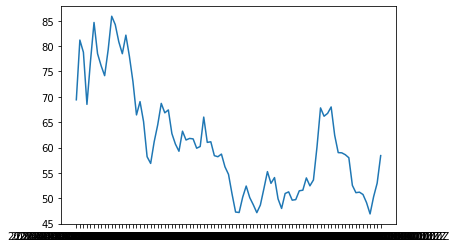

In [376]:
plt.plot(api_df['Dates'],api_df['Closes'])
plt.show()

## Start Model Building W/ CSV

In [377]:
# pd.to_datetime(api_df['Dates'])
# api_df['Dates'] = api_df['Dates'].astype(str)
api_df

,Dates,Closes
0,2020-07-02T00:00:00.000Z,69.41
1,2020-07-06T00:00:00.000Z,81.19
2,2020-07-07T00:00:00.000Z,78.79
3,2020-07-08T00:00:00.000Z,68.51
4,2020-07-09T00:00:00.000Z,77.01
...,...,...
82,2020-10-28T00:00:00.000Z,49.13
83,2020-10-29T00:00:00.000Z,46.90
84,2020-10-30T00:00:00.000Z,50.29
85,2020-11-02T00:00:00.000Z,52.96


In [378]:
# df = pd.read_csv('Data/CAKE.csv', header=0, usecols=['Date', 'Close'], parse_dates=True, index_col='Date')
# df.head()
api_df.columns

Index(['Dates', 'Closes'], dtype='object')

In [379]:
# from datetime import datetime
# api_df['Dates'] = datetime.fromisoformat(api_df['Dates'][14][:-1])
# # api_df[:-5]
# api_df['Dates']
# df['New_Sample'] = df.Sample.apply(lambda x: x[:1])

In [380]:
# df.tail()
api_df['Dates'] = api_df['Dates'][0][:-14]
# api_df[:-5]
api_df['Dates']

0     2020-07-02
1     2020-07-02
2     2020-07-02
3     2020-07-02
4     2020-07-02
         ...    
82    2020-07-02
83    2020-07-02
84    2020-07-02
85    2020-07-02
86    2020-07-02
Name: Dates, Length: 87, dtype: object

## Perform Data Preprocessing

In [381]:
# api_df['Dates'] = api_df['Dates'].astype(float)
#df['DataFrame Column'] = df['DataFrame Column'].astype(float)

#This will turn all of the string value into category values
for label, content in api_df.items():
    if pd.api.types.is_string_dtype(content):
        api_df[label] = content.astype("category").cat.as_ordered()

In [382]:
api_df['Dates']

0     2020-07-02
1     2020-07-02
2     2020-07-02
3     2020-07-02
4     2020-07-02
         ...    
82    2020-07-02
83    2020-07-02
84    2020-07-02
85    2020-07-02
86    2020-07-02
Name: Dates, Length: 87, dtype: category
Categories (1, object): ['2020-07-02']

# Convert String into Datetime Object

In [383]:
api_df['Dates'] = pd.to_datetime(api_df['Dates'])

api_df['Dates']

0    2020-07-02
1    2020-07-02
2    2020-07-02
3    2020-07-02
4    2020-07-02
        ...    
82   2020-07-02
83   2020-07-02
84   2020-07-02
85   2020-07-02
86   2020-07-02
Name: Dates, Length: 87, dtype: category
Categories (1, datetime64[ns]): [2020-07-02]

## Scale Data

In [395]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(api_df)


In [396]:
scaled_data

array([[0.57732752],
       [0.87945627],
       [0.81790203],
       [0.55424468],
       [0.77224929],
       [0.96845345],
       [0.81046422],
       [0.74993588],
       [0.69941011],
       [0.83072583],
       [1.        ],
       [0.95768146],
       [0.87073609],
       [0.81046422],
       [0.90433444],
       [0.79687099],
       [0.66940241],
       [0.50089767],
       [0.56809438],
       [0.46678636],
       [0.28930495],
       [0.25545012],
       [0.36522185],
       [0.45088484],
       [0.55911772],
       [0.51141318],
       [0.52603232],
       [0.40651449],
       [0.35316748],
       [0.31700436],
       [0.41856886],
       [0.37394204],
       [0.38189279],
       [0.37958451],
       [0.33239292],
       [0.34111311],
       [0.4898692 ],
       [0.36188766],
       [0.36496538],
       [0.29469095],
       [0.28930495],
       [0.3026417 ],
       [0.23826622],
       [0.2000513 ],
       [0.10079508],
       [0.00948961],
       [0.00718133],
       [0.084

## Test Train Split

In [397]:
train_length = int(len(scaled_data) * .7)
test_length = len(scaled_data) - train_length
train_data = scaled_data[0:train_length, :]
test_data = scaled_data[train_length: len(scaled_data), :]

In [398]:
# turn data into np arrays
import numpy as np 

In [399]:
def create_dataset(dataset, timestep):
    data_x, data_y = [], []
    
    for i in range(len(dataset)-timestep-1):
        data_x.append(dataset[i:(i+timestep),0])
        data_y.append(dataset[i+timestep,0])
        
    return np.array(data_x), np.array(data_y)
        

In [400]:
timestep = 1 
train_x, train_y = create_dataset(train_data, timestep)
test_x, test_y = create_dataset(test_data, timestep)

print(train_x[:10])

[[0.57732752]
 [0.87945627]
 [0.81790203]
 [0.55424468]
 [0.77224929]
 [0.96845345]
 [0.81046422]
 [0.74993588]
 [0.69941011]
 [0.83072583]]


In [401]:
print(train_x.shape)

(58, 1)


In [402]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
print(train_x)

[[[0.57732752]]

 [[0.87945627]]

 [[0.81790203]]

 [[0.55424468]]

 [[0.77224929]]

 [[0.96845345]]

 [[0.81046422]]

 [[0.74993588]]

 [[0.69941011]]

 [[0.83072583]]

 [[1.        ]]

 [[0.95768146]]

 [[0.87073609]]

 [[0.81046422]]

 [[0.90433444]]

 [[0.79687099]]

 [[0.66940241]]

 [[0.50089767]]

 [[0.56809438]]

 [[0.46678636]]

 [[0.28930495]]

 [[0.25545012]]

 [[0.36522185]]

 [[0.45088484]]

 [[0.55911772]]

 [[0.51141318]]

 [[0.52603232]]

 [[0.40651449]]

 [[0.35316748]]

 [[0.31700436]]

 [[0.41856886]]

 [[0.37394204]]

 [[0.38189279]]

 [[0.37958451]]

 [[0.33239292]]

 [[0.34111311]]

 [[0.4898692 ]]

 [[0.36188766]]

 [[0.36496538]]

 [[0.29469095]]

 [[0.28930495]]

 [[0.3026417 ]]

 [[0.23826622]]

 [[0.2000513 ]]

 [[0.10079508]]

 [[0.00948961]]

 [[0.00718133]]

 [[0.08412413]]

 [[0.14106181]]

 [[0.08258528]]

 [[0.04642216]]

 [[0.0064119 ]]

 [[0.0448833 ]]

 [[0.12772506]]

 [[0.213901  ]]

 [[0.15465504]]

 [[0.18389331]]

 [[0.07617338]]]


## Build Our Model

In [403]:
from keras.models import Sequential 
from keras.layers import LSTM, Dense 

In [404]:
model = Sequential()

# add our layers 

# add an lstm layer
model.add(LSTM(256, input_shape=(1,1)))
model.add(Dense(1, activation='relu'))

# set our loss and optimize 
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________
None


# Train & Fit Model

In [405]:
model.fit(train_x, train_y, epochs=1, batch_size=1, verbose=1)
score = model.evaluate(train_x, train_y, verbose=0)
print('Keras model loss =', score[0])
print('Keras model accuracy =', score[1])

58/58 [==============================] - 0s 4ms/step - loss: 0.1239 - accuracy: 0.0000e+00
Keras model loss = 0.04319775477051735
Keras model accuracy = 0.017241379246115685


## Evaluating Model

In [406]:
train_preds = model.predict(train_x)
test_preds = model.predict(test_x)

train_preds

array([[0.4471217 ],
       [0.5427542 ],
       [0.5231578 ],
       [0.4398742 ],
       [0.50866014],
       [0.57118386],
       [0.5207936 ],
       [0.5015858 ],
       [0.4855947 ],
       [0.52723575],
       [0.5812881 ],
       [0.56773686],
       [0.5399745 ],
       [0.5207936 ],
       [0.55068994],
       [0.5164753 ],
       [0.47611615],
       [0.42315808],
       [0.44422165],
       [0.4124942 ],
       [0.3573317 ],
       [0.34687224],
       [0.3808603 ],
       [0.40752974],
       [0.4414035 ],
       [0.4264493 ],
       [0.43102816],
       [0.39370018],
       [0.37711748],
       [0.36590463],
       [0.39745393],
       [0.38356942],
       [0.38604054],
       [0.3853229 ],
       [0.37067333],
       [0.3733773 ],
       [0.41970828],
       [0.3798248 ],
       [0.38078055],
       [0.35899767],
       [0.3573317 ],
       [0.36145768],
       [0.34157112],
       [0.3298014 ],
       [0.29935747],
       [0.27151608],
       [0.27081427],
       [0.294

In [407]:
train_preds = scaler.inverse_transform(train_preds)
train_y = scaler.inverse_transform([train_y])

test_preds = scaler.inverse_transform(test_preds)
test_y = scaler.inverse_transform([test_y])

print(train_preds)

[[64.333275]
 [68.06198 ]
 [67.29792 ]
 [64.05069 ]
 [66.73266 ]
 [69.17046 ]
 [67.20574 ]
 [66.45683 ]
 [65.833336]
 [67.456924]
 [69.56442 ]
 [69.03606 ]
 [67.953606]
 [67.20574 ]
 [68.3714  ]
 [67.03737 ]
 [65.46377 ]
 [63.398933]
 [64.2202  ]
 [62.983147]
 [60.832363]
 [60.424545]
 [61.749744]
 [62.78958 ]
 [64.11032 ]
 [63.527256]
 [63.705788]
 [62.25037 ]
 [61.60381 ]
 [61.166622]
 [62.39673 ]
 [61.855373]
 [61.95172 ]
 [61.92374 ]
 [61.35255 ]
 [61.45798 ]
 [63.264423]
 [61.709366]
 [61.746635]
 [60.89732 ]
 [60.832363]
 [60.993237]
 [60.217857]
 [59.758957]
 [58.57195 ]
 [57.486412]
 [57.45905 ]
 [58.373287]
 [59.05264 ]
 [58.354954]
 [57.924755]
 [57.44993 ]
 [57.90647 ]
 [58.893295]
 [59.92515 ]
 [59.21517 ]
 [59.56524 ]
 [58.278606]]


In [408]:
train_predict_plot = np.empty_like(scaled_data)
# create an empty array
train_predict_plot[:,:] = np.nan
train_predict_plot[1:len(train_preds)+1, :] = train_preds 

In [409]:
test_predict_plot = np.empty_like(scaled_data)
# create an empty array
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_preds)+2+1:len(scaled_data)-1, :] = test_preds 

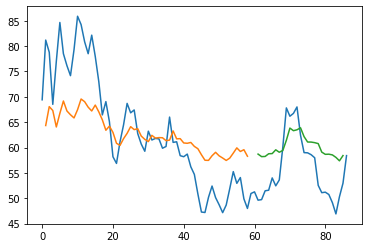

In [410]:
# blue
plt.plot(scaler.inverse_transform(scaled_data), label='')
# orange
plt.plot(train_predict_plot)
# green
plt.plot(test_predict_plot)
plt.show()